In [1]:
#Black scholes has these assumptions:
#Arbitrage Free Markets
#Frictionless and Continuous Markets
#Risk Free Rates
#Log-normally Distributed Price Movements
#Constant Volatility
import math 
import pandas as pd
import numpy as np 
from numpy import *
from scipy.stats import norm

import matplotlib.pyplot as plt 
from tabulate import tabulate

In [2]:
df=pd.read_csv('C:\\Users\\bavsr\\Downloads\\AAPL.csv',encoding='latin-1')
df.tail(3)

,Date,Open,High,Low,Close,Adj Close,Volume
249,2021-09-22,144.449997,146.429993,143.699997,145.850006,145.850006,76404300
250,2021-09-23,146.649994,147.080002,145.639999,146.830002,146.830002,64838200
251,2021-09-24,145.660004,147.470001,145.559998,146.919998,146.919998,53434200


In [7]:
class BS:
    """"
    Attrubitues....:
    spot: int or float
    strike: int or float
    rate: float
    dte: float in years
    vol: float 
    
    """
 
 
    def __init__(self,spot,strike,rate,dte,vol):
        self.spot=spot #underlying assest price
        self.strike=strike #Price of the option
        self.rate=rate #intrest rate
        self.dte=dte #Maturity date
        self.vol=vol #Volatilty 
        
        self._a=self.vol*self.dte**0.5 #(sigma*root(t))
        
        if self.strike==0:
            raise ZerodevisionError("Strike price cannot be zero")
        else:
            self._d1=(log(self.spot/self.strike)+
                      (self.rate+(self.vol**2)/2)*self.dte)/self._a
        self._d2=self._d1-self._a #d2=d1-sigma*root(t)
        self._b=e**-(self.rate*self.dte) #e^-rt
        
        '''
        Contains all the attributes defined for the object itself. It maps the attribute name to its value.
        '''
        for i in ['callPrice', 'putPrice', 'callDelta', 'putDelta', 'callTheta', 'putTheta', \
                  'callRho', 'putRho', 'vega', 'gamma']:
            self.__dict__[i] = None
        
        [self.callPrice, self.putPrice] = self._price()
        [self.callDelta, self.putDelta] = self._delta()
        [self.callTheta, self.putTheta] = self._theta()
        [self.callRho, self.putRho] = self._rho()
        self.vega = self._vega()
        self.gamma = self._gamma()
        
    
        
    def _price(self):
        if (self.vol==0 or self.dte==0):
            call=max(0,self.spot-self.strike)
            put=max(0,self.strike-self.spot)
        else:
            call=self.spot * norm.cdf(self._d1)-self.strike*self._b*norm.cdf(self._d2)
            put=self.strike * norm.cdf(-self._d2)-self.strike*norm.cdf(-self._d1)
            
        return (call,put)
    
    def _delta(self):
        if self.vol==0 or self.dte==0:
            call = 1.0 if self.spot > self.strike else 0.0
            put = -1.0 if self.spot < self.strike else 0.0
        else:
            call=norm.cdf(self._d1)
            put=-norm.cdf(-self._d1)
        
        return (call,put)
    
    def _option(self):
        return norm.pdf(self._d1)/(self.strike*self._a)
    
    def _vega(self):
        if self.vol==0 or self.dte==0:
            return 0.0
        
        else:
            return self.spot*norm.pdf(self._d1)*(self.dte**0.5/100)
    
    def _theta(self):
        call = -self.spot * norm.pdf(self._d1) * self.vol / (2 * self.dte**0.5) - self.rate * self.strike * self._b * norm.cdf(self._d2)
        put = -self.spot * norm.pdf(self._d1) * self.vol / (2 * self.dte**0.5) + self.rate * self.strike * self._b * norm.cdf(-self._d2)
        return [call / 365, put / 365]
    
    def _rho(self):
        call = self.strike * self.dte * self._b* norm.cdf(self._d2) / 100
        put = -self.strike * self.dte * self._b * norm.cdf(-self._d2) / 100
        return [call, put]
    
    def _gamma(self):
        return norm.pdf(self._d1) / (self.spot * self._a)


        
            
            
            
            
    
    
    

In [8]:
apple_options=BS(100,100,0.0,1,0.2)
apple_options.putTheta

-0.010875412259644158

In [9]:
header=['Option Price','Delta','Gamma','Theta','Vega','Rho']
table=[[apple_options.callPrice,apple_options.callDelta,apple_options.gamma,apple_options.callTheta,apple_options.vega,apple_options.callRho]]
print(tabulate(table,header))

  Option Price     Delta      Gamma       Theta      Vega       Rho
--------------  --------  ---------  ----------  --------  --------
       7.96557  0.539828  0.0198476  -0.0108754  0.396953  0.460172


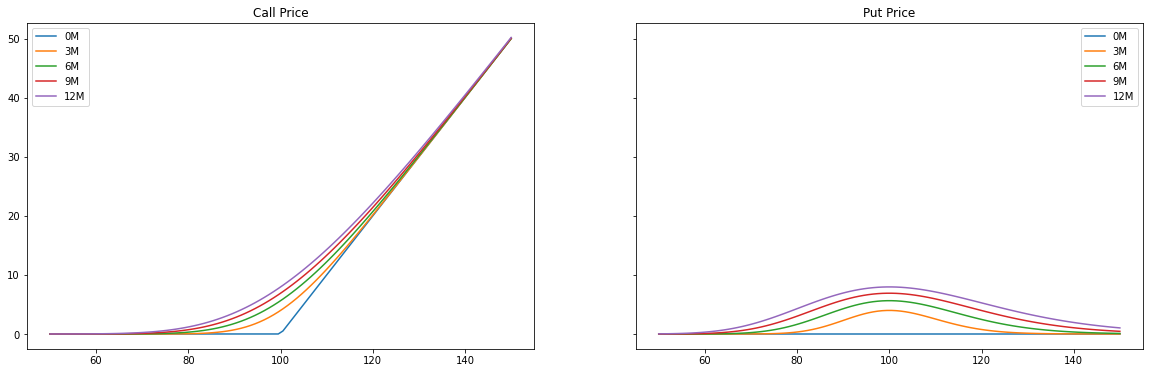

In [10]:
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)

x = linspace(50,150,100)
d = {'0M':1e-50, '3M': 0.25, '6M': 0.5, '9M': 0.75, '12M': 1.0}

for k,v in d.items():
    axes[0].plot(x, BS(x,100,0.0,v,0.2).callPrice, label=k)
    axes[1].plot(x, BS(x,100,0.0,v,0.2).putPrice, label=k)
    
# Set axis title
axes[0].set_title('Call Price'), axes[1].set_title('Put Price')

# Define legend
axes[0].legend(), axes[1].legend()

plt.show()


Text(0.5, 1.0, 'ATM Straddle Price')

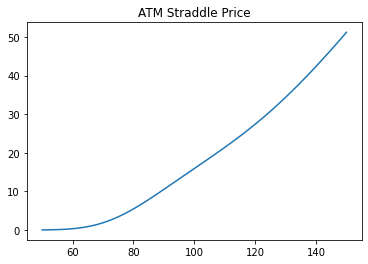

In [13]:
plt.plot(x,BS(x,100,0,1,0.2).callPrice+BS(x,100,0,1,0.2).putPrice)
plt.title('ATM Straddle Price')

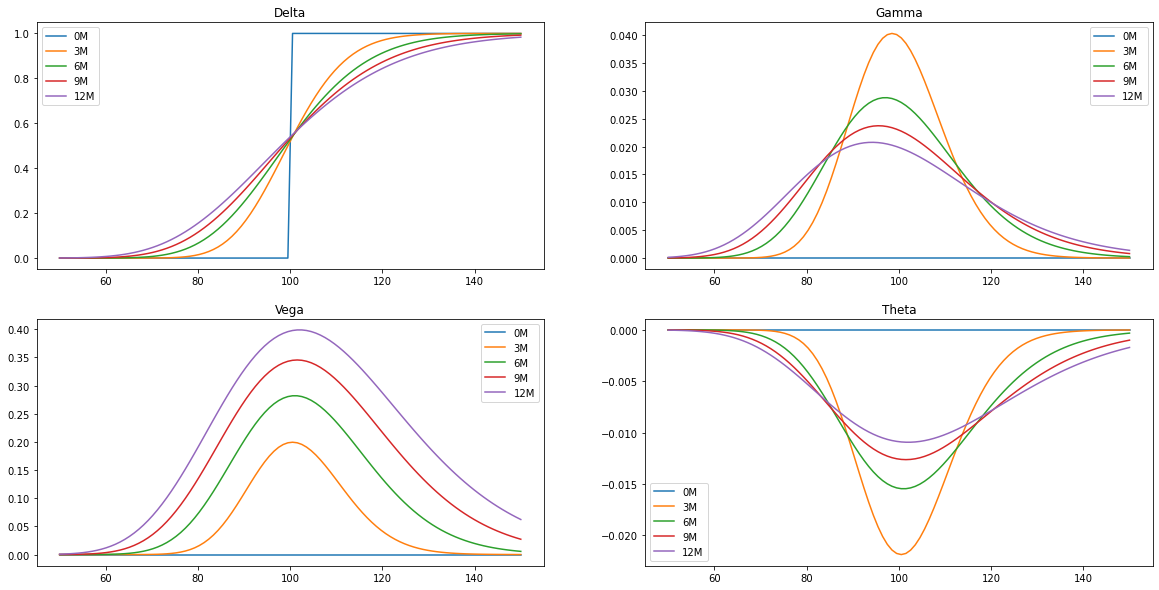

In [14]:
# Plot graph iteratively
fig, ax = plt.subplots(2,2, figsize=(20,10))

for k,v in d.items():
    ax[0,0].plot(x, BS(x,100,0.0,v,0.2).callDelta, label=k)
    ax[0,1].plot(x, BS(x,100,0.0,v,0.2).gamma, label=k)
    ax[1,0].plot(x, BS(x,100,0.0,v,0.2).vega, label=k)
    ax[1,1].plot(x, BS(x,100,0.0,v,0.2).callTheta, label=k)
    
# Set axis title
ax[0,0].set_title('Delta'), ax[0,1].set_title('Gamma'), ax[1,0].set_title('Vega'), ax[1,1].set_title('Theta')

# Define legend
ax[0,0].legend(), ax[0,1].legend(), ax[1,0].legend(), ax[1,1].legend()

plt.show()